In [ ]:
import pandas as pd
from datetime import datetime
import numpy as np

In [ ]:
STATUS_LOG_PATH     = '../../data/status_log.csv"
TICKETS_PATH        = '../../data/tickets.csv"
TICKETS_FOLDER_PATH = '../../data/tickets/"
FAQ_QUESTIONS_PATH  = '../../data/FAQ_questions.txt"

DATA_PATH    = '../../data/tickets_postprp.pkl'
DE_FLAT_PATH = '../../data/de_flat.csv'

df = pd.read_csv(STATUS_LOG_PATH)

In [ ]:
df.head()

,ID,Datum,Uhrzeit,Geändert Von,Status ID,Status Text
0,2000000060,2015.11.25,22:09:11,H2851RM4,E0001,Neu
1,2000000060,2015.11.26,16:58:21,H2851RM4,E0002,In Bearbeitung
2,2000000060,2015.12.18,03:00:47,H2851RM1,E0005,Lösungsvorschlag
3,2000000060,2015.12.18,03:00:47,H2851RM1,E0008,Quittiert
4,2000000070,2015.11.26,16:03:04,H2851AA2,E0001,Neu


In [ ]:
df_quit = df[df["Status Text"] == "Quittiert"].reset_index()
df_neu = df[df["Status Text"] == "Neu"].reset_index()

In [ ]:
df_quit = df_quit[df_quit["ID"].isin(df_neu["ID"].to_list())]

In [ ]:
df_quit.shape

(10689, 7)

In [ ]:
df_neu = df_neu[df_neu["ID"].isin(df_quit["ID"].to_list())]

In [ ]:
df_neu.shape

(10689, 7)

In [ ]:
df_neu["time"] = df_neu["Datum"] + " " + df_neu["Uhrzeit"]
df_quit["time"] = df_quit["Datum"] + " " + df_quit["Uhrzeit"]

In [ ]:
df_neu["timeStart"] = df_neu["time"].apply(lambda s: datetime.strptime(s, '%Y.%m.%d %H:%M:%S'))

In [ ]:
df_quit["timeFinish"] = df_quit["time"].apply(lambda s: datetime.strptime(s, '%Y.%m.%d %H:%M:%S'))

In [ ]:
df_quit.drop(["index", "Datum", "Uhrzeit", "Geändert Von", "Status ID", "Status Text", "time"], axis=1, inplace=True)
df_neu.drop(["index", "Datum", "Uhrzeit", "Geändert Von", "Status ID", "Status Text", "time"], axis=1, inplace=True)

In [ ]:
df = pd.merge(df_neu, df_quit, on='ID')

In [ ]:
df["Time Taken"] = df["timeFinish"] - df["timeStart"]

In [ ]:
df["Time Taken"] = df["Time Taken"].apply(lambda t: (t.total_seconds())/3600)

In [ ]:
df

,ID,timeStart,timeFinish,Time Taken
0,2000000060,2015-11-25 22:09:11,2015-12-18 03:00:47,532.860000
1,2000000070,2015-11-26 16:03:04,2016-03-08 10:59:56,2466.947778
2,2000000071,2015-11-26 17:59:58,2016-05-31 18:00:40,4488.011667
3,2000000073,2015-11-27 09:31:03,2016-05-31 18:00:40,4472.493611
4,2000000080,2015-12-03 14:12:58,2015-12-18 15:40:35,361.460278
...,...,...,...,...
10684,2000012385,2021-05-31 08:31:18,2021-06-02 15:38:48,55.125000
10685,8000000021,2014-08-09 17:56:31,2014-08-09 18:26:14,0.495278
10686,8000000081,2014-08-06 20:04:35,2014-08-06 20:16:40,0.201389
10687,8000000131,2014-08-02 18:16:55,2014-08-04 22:37:25,52.341667


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

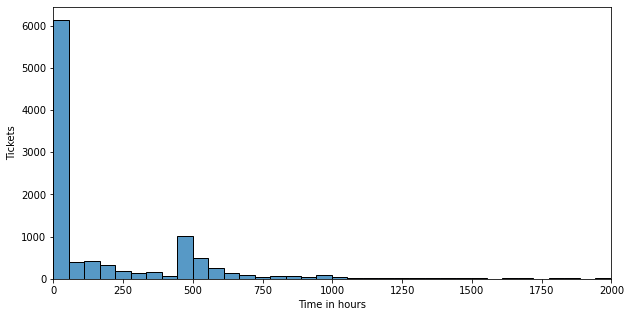

In [ ]:
plt.figure(figsize=(10,5))
plt.xlim(0,2000)
plt.xlabel('Time in hours')
plt.ylabel('Tickets')
sns.histplot(df['Time Taken'],bins=500,kde=False)
plt.show()

In [ ]:
df_tickets = pd.read_csv(TICKETS_PATH)

In [ ]:
df_tickets = df_tickets[df_tickets["Angelegt Von"] != "SOLMAN_BTC "]

In [ ]:
df_tickets.shape

(6655, 18)

In [ ]:
df = df[df["ID"].isin(df_tickets["ID"])]


In [ ]:
df.shape

(5711, 4)

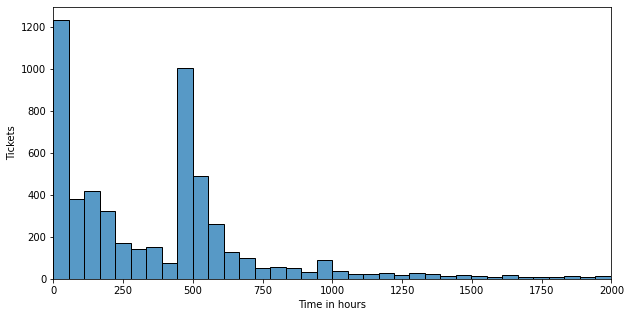

In [ ]:
plt.figure(figsize=(10,5))
plt.xlim(0,2000)
plt.xlabel('Time in hours')
plt.ylabel('Tickets')
sns.histplot(df['Time Taken'],bins=500,kde=False)
plt.show()

In [ ]:
df_tickets["Kategorie ID"].replace({" ": "AUTOMATED"}, inplace=True)

In [ ]:
df_tickets[df_tickets["Meldender"] == " "]

,ID,Beschreibung,Kategorie ID,Kategorietext,Unterkategorie ID,Unterkategorietext,Status,Angelegt Am,Angelegt Von,Geändert Am,Geändert Von,Auftraggeber,Meldender,Support Team,Bearbeiter,Nr. Nachrichten,Erste Antwort,Letzte Antwort
20,2000000123,Hello from SAPGui on system I40,AUTOMATED,,,,E0008 Quittiert,2015.12.15\t22:34:03,SMB_I4000001,2016.01.22\t16:47:01,H2851AS9,,,0000000046,H2851AS9,3,2015.12.15\t23:33:59,2016.01.22\t17:47:00
21,2000000130,Hello from SAPGui on I41 via Trusted-RF,AUTOMATED,,,,E0008 Quittiert,2015.12.16\t14:35:11,MASTER-ADM,2016.01.22\t16:46:40,H2851AS9,,,0000000046,H2851AS9,3,2015.12.16\t15:35:05,2016.01.22\t17:46:39
22,2000000131,Schaue nach vorne,AUTOMATED,,,,E0008 Quittiert,2015.12.16\t14:46:06,H2851RM4,2016.01.22\t16:48:52,H2851AS9,,,0000000046,H2851AS9,3,2015.12.16\t15:46:05,2016.01.22\t17:48:51
23,2000000132,Hello from I40 via Trusted RFC,AUTOMATED,,,,E0008 Quittiert,2015.12.16\t14:50:53,MASTER-ADM,2016.01.22\t16:45:57,H2851AS9,,,0000000046,H2851AS9,3,2015.12.16\t15:50:52,2016.01.22\t17:45:57
24,2000000133,Problem,AUTOMATED,,,,E0008 Quittiert,2015.12.16\t15:09:48,H2851LP2,2016.01.22\t16:45:39,H2851AS9,,,0000000046,H2851AS9,3,2015.12.16\t16:09:47,2016.01.22\t17:45:38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12179,8000002921,Issue creation test,AUTOMATED,,,,E0001 Offen,2021.06.01\t15:27:21,SOLMAN_BTC,2021.06.01\t15:27:21,SOLMAN_BTC,,,,NaN,2,2021.06.01\t17:27:21,2021.06.01\t17:27:21
12180,8000002922,Issue creation test,AUTOMATED,,,,E0001 Offen,2021.06.02\t15:27:07,SOLMAN_BTC,2021.06.02\t15:27:07,SOLMAN_BTC,,,,NaN,2,2021.06.02\t17:27:07,2021.06.02\t17:27:07
12181,8000002923,Issue creation test,AUTOMATED,,,,E0001 Offen,2021.06.03\t15:27:29,SOLMAN_BTC,2021.06.03\t15:27:29,SOLMAN_BTC,,,,NaN,2,2021.06.03\t17:27:29,2021.06.03\t17:27:29
12182,8000002924,Issue creation test,AUTOMATED,,,,E0001 Offen,2021.06.04\t15:27:21,SOLMAN_BTC,2021.06.04\t15:27:22,SOLMAN_BTC,,,,NaN,2,2021.06.04\t17:27:21,2021.06.04\t17:27:21



# Data cleaning and encode non-numaric values

In [ ]:
df = pd.read_pickle(DATA_PATH)

In [ ]:
df["kategorie_id"] = df["kategorie_id"].astype('category')
df["kategorie_id"] = df["kategorie_id"].cat.codes

df["unterkategorie_id"] = df["unterkategorie_id"].astype('category')
df["unterkategorie_id"] = df["unterkategorie_id"].cat.codes

df["meldender"] = df["meldender"].astype('category')
df["meldender"] = df["meldender"].cat.codes

df["angelegt_von"] = df["angelegt_von"].astype('category')
df["angelegt_von"] = df["angelegt_von"].cat.codes

df["auftraggeber"] = df["auftraggeber"].astype('category')
df["auftraggeber"] = df["auftraggeber"].cat.codes

df

,id,beschreibung,kategorie_id,kategorietext,unterkategorie_id,unterkategorietext,status,angelegt_am,angelegt_von,auftraggeber,meldender,bearbeiter,editors,num_editors,time_start,time_finish,time_taken,num_messages,first_date,last_date,description,answer,initial_message,internal_note,similarity,differences,language,max_similarity,faq_index_max_sim,min_difference,faq_index_min_dif,embeddings
0,2000000060,,0,Allgemeine Anfragen,7,Sonstiges,E0008 Quittiert,1.448477e+09,83,39,90,H2851RM1,H2851DP2;H2851RM4;,2,2015-11-25 22:09:11,2015-12-18 03:00:47,532.860000,5,2015.11.25T19:35:19,2015.11.26T14:26:08,"Hallo zusammenaktuell sind die Systeme i06, i...",Hi Nochmalmacht ihr gerade irgendwas an eurem...,"Hallo zusammenaktuell sind die Systeme i06, i...",NaN,[[0.7627752 0.65349996 0.78303057 0.8002256 ...,[[10.717915 12.945717 10.385809 9.650245 ...,de,0.838987,15,8.771477,15,"[0.02682937, 0.745793, 1.5697192, 0.29429996, ..."
1,2000000070,,2,SAP Netweaver Business Objects,1,Fallstudienproblem,E0008 Quittiert,1.448546e+09,209,99,228,NaN,None,0,2015-11-26 16:03:04,2016-03-08 10:59:56,2466.947778,5,2015.11.26T14:49:16,2015.11.26T16:08:45,"Ich weiß nicht, woher ich die SW Information ...",. Hat sich erledigt Leider kann ich den Lösun...,"Ich weiß nicht, woher ich die SW Information ...",NaN,[[0.7663897 0.6607722 0.742164 0.78014624 ...,[[10.720519 12.917588 11.394227 10.216988 10.5...,de,0.808579,14,9.583436,14,"[-0.17896071, 1.1137556, 0.8884165, 0.37613705..."
2,2000000071,,2,SAP Netweaver Business Objects,1,Fallstudienproblem,E0008 Quittiert,1.448549e+09,209,99,228,H2851LP2,BORYS;,1,2015-11-26 17:59:58,2016-05-31 18:00:40,4488.011667,5,2015.11.26T15:37:34,2016.05.31T18:00:40,Da ich keine neue Connection anlegen kann (is...,"Liebes Team,nächste Woche habe ich hierzu ein...",Da ich keine neue Connection anlegen kann (is...,NaN,[[0.76934516 0.70103467 0.7809094 0.8292762 ...,[[10.589155 12.052583 10.452986 8.940967 ...,de,0.871860,16,7.810720,14,"[-0.34631374, 1.0302987, 1.1605979, 0.33602512..."
3,2000000073,,4,SAP Business by Design,19,Passwortrücksetzung für Masteruser,E0008 Quittiert,1.448560e+09,265,117,287,H2851GB2,BORYS;,1,2015-11-27 09:31:03,2016-05-31 18:00:40,4472.493611,1,2016.05.31T18:00:40,2016.05.31T18:00:40,NaN,"Meldung automatisch durch Report ""AI_SDK_SP_A...","Meldung automatisch durch Report ""AI_SDK_SP_A...",NaN,[[0.66387796 0.5765782 0.6556866 0.6701319 ...,[[12.662242 14.205878 12.973542 12.3057785 ...,de,0.730820,17,11.220666,17,"[-0.1209006, 0.41539708, 1.6555126, 0.09115197..."
4,2000000080,,9,SAP ERP GBI,43,Sonstiges,E0008 Quittiert,1.448878e+09,192,91,210,H2851RH3,H2851RH3;,1,2015-12-03 14:12:58,2015-12-18 15:40:35,361.460278,5,2015.11.30T11:14:29,2015.12.16T17:14:56,"Guten Morgen, SAP UCC Team,ich würde gerne di...","Liebes UCC Team,hiermit bitte ich um schnelle...","Guten Morgen, SAP UCC Team,ich würde gerne di...",NaN,[[0.6225233 0.61645836 0.5815674 0.6016834 ...,[[13.312766 13.422146 14.184176 13.406805 12.1...,de,0.788153,17,9.892563,17,"[-0.30318347, 1.3466955, 0.34771574, 0.2368324..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11345,2000012393,Wechsel von i15 auf e01 ?,18,SAP ERPsim,86,Sonstiges,E0002 In Bearbeitung,1.622559e+09,420,188,448,H2851SH5,H2851BL1;H2851SH5;,2,NaT,NaT,NaN,4,2021.06.01T16:53:26,2021.06.02T14:57:18,"Hallo,Könntet ihr den Jahresmandanten von IES...","Hallo ,Noch diese Woche wenn das für euch geh...","Hallo,Könntet ihr den Jahresmandanten von IES...",bin hoffentlich richtig bei dir :),[[0.7455536 0.66865635 0.7314939 0.7450667 ...,[[11.028631 12.5759535 11.474325 10.82076 ...,de,0.798759,15,9.740318,15,"[-0.581097, 0.9130754, 1.3915614, 0.29261842, ..."
11346,2000012394,Deprov. Exklusivsystem I29,9,SAP ERP GBI,44,Systemrücksetzung,E0008 Quittiert,1.622562e+09,288,117,309,H2851SF2,H2851SF2;,1,NaT,NaT,NaN,2,2021.06.01T17:42:36,2021.06.02T10:58:52,"Hi ,das ECC 6.08 GBI 3.20 - Exklusivsystem I2...","

In [ ]:
df = df.drop(columns=['id', 'beschreibung','kategorietext',
       'unterkategorietext','bearbeiter', 'editors',
       'num_editors', 'time_start', 'status', 'time_finish',
       'num_messages', 'first_date', 'last_date', 'description', 'answer',
       'initial_message', 'internal_note', 'similarity', 'differences',
       'language', 'faq_index_max_sim',
       'faq_index_min_dif'])
df.reset_index()
df

,kategorie_id,unterkategorie_id,angelegt_am,angelegt_von,auftraggeber,meldender,time_taken,max_similarity,min_difference,embeddings
0,0,7,1.448477e+09,83,39,90,532.860000,0.838987,8.771477,"[0.02682937, 0.745793, 1.5697192, 0.29429996, ..."
1,2,1,1.448546e+09,209,99,228,2466.947778,0.808579,9.583436,"[-0.17896071, 1.1137556, 0.8884165, 0.37613705..."
2,2,1,1.448549e+09,209,99,228,4488.011667,0.871860,7.810720,"[-0.34631374, 1.0302987, 1.1605979, 0.33602512..."
3,4,19,1.448560e+09,265,117,287,4472.493611,0.730820,11.220666,"[-0.1209006, 0.41539708, 1.6555126, 0.09115197..."
4,9,43,1.448878e+09,192,91,210,361.460278,0.788153,9.892563,"[-0.30318347, 1.3466955, 0.34771574, 0.2368324..."
...,...,...,...,...,...,...,...,...,...,...
11345,18,86,1.622559e+09,420,188,448,NaN,0.798759,9.740318,"[-0.581097, 0.9130754, 1.3915614, 0.29261842, ..."
11346,9,44,1.622562e+09,288,117,309,NaN,0.836010,8.769311,"[-0.4206453, 0.87035596, 1.307213, 0.35392675,..."
11348,3,18,1.622645e+09,343,148,365,NaN,0.776689,10.290266,"[-0.81413245, 0.938978, 1.3747407, 0.40808743,..."
11349,14,97,1.622699e+09,223,101,242,NaN,0.771880,10.459263,"[-0.51646024, 1.1733948, 1.4599037, 0.2729973,..."


In [ ]:
df_emb = pd.DataFrame(data=np.stack(df.embeddings.to_numpy()))

In [ ]:
 result = pd.concat([df, df_emb], axis=1, join="inner")
 result = result.drop(columns=["embeddings"])
 result

,index,kategorie_id,unterkategorie_id,angelegt_am,angelegt_von,auftraggeber,meldender,time_taken,max_similarity,min_difference,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,...,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767
0,0,0,7,1.448477e+09,83,39,90,532.860000,0.838987,8.771477,0.026829,0.745793,1.569719,0.294300,0.600494,-0.528314,1.233447,0.026006,0.295213,0.116997,-0.425037,0.313938,0.478777,0.847673,-0.312625,0.408335,-0.566604,-0.807065,0.147964,-0.970049,0.034359,0.037653,0.100943,0.579423,0.991710,0.199135,0.160252,-1.240878,-0.861513,0.099287,...,-0.943985,-0.667388,-0.787463,-0.369550,-0.447017,0.637555,0.811601,0.100958,-0.084323,0.400581,-0.432379,-0.466126,0.491138,0.376300,-0.812113,0.110448,0.018973,0.121687,-0.290873,-0.072837,0.163185,0.605283,0.213672,-0.166747,0.243708,-0.027944,-0.141373,0.320668,-0.303989,-0.383511,0.171681,-0.970465,-0.779608,-0.396681,-0.419788,-0.354270,0.024651,-0.657587,0.252624,0.253650
1,1,2,1,1.448546e+09,209,99,228,2466.947778,0.808579,9.583436,-0.178961,1.113756,0.888417,0.376137,0.532763,-0.670216,1.589730,-0.274193,0.577264,0.188875,-0.908410,0.288017,0.094443,0.584255,-0.343807,0.730787,-0.127636,-0.576940,0.365440,-0.551842,-0.298335,-0.302421,-0.703809,0.431586,0.820062,0.591188,0.609194,-0.598472,-0.500709,0.212681,...,-0.680368,-0.821095,-0.536090,-0.190660,-0.354444,0.793692,1.099548,0.291756,-0.592942,-0.089355,-0.413141,-0.370961,-0.207876,0.203523,-0.855345,0.353193,-0.098239,0.022163,-0.241898,-0.170942,-0.150945,0.178721,0.621283,0.021794,0.220604,0.373697,0.066445,0.032397,-0.253921,-0.113820,0.105072,-0.024639,-0.599453,-0.912288,-0.918596,-0.128095,0.748243,-0.574468,0.088562,0.642879
2,2,2,1,1.448549e+09,209,99,228,4488.011667,0.871860,7.810720,-0.346314,1.030299,1.160598,0.336025,0.619674,-0.381174,1.088107,-0.529647,0.327423,-0.191791,-0.404771,-0.147880,0.414193,0.347005,-0.539718,0.568094,-0.186415,-0.824551,0.502266,-0.595117,-0.067611,-0.390134,-0.221788,0.486699,0.492856,0.584592,0.304154,-1.443035,-0.849543,0.065791,...,-0.726798,-0.354138,-0.549929,-0.438253,-0.453088,0.671194,1.110149,-0.220078,-0.326893,0.033089,-0.182711,-0.191682,0.268484,0.149446,-1.093348,-0.053756,-0.253558,0.291647,-0.734838,-0.068764,0.213447,0.432886,0.225194,0.119115,0.326618,0.168443,-0.273835,0.446187,-0.087169,0.069634,0.497914,-0.652462,-0.396579,-0.646097,-0.651879,-0.329418,0.231550,-0.455628,0.120954,0.613096
3,3,4,19,1.448560e+09,265,117,287,4472.493611,0.730820,11.220666,-0.120901,0.415397,1.655513,0.091152,1.092160,-0.531278,0.635962,-0.047261,0.155721,0.325669,-0.804727,0.668300,-0.134283,0.441007,-0.215559,0.573008,-1.118991,-0.291707,0.455375,-0.269874,-0.029952,-0.257809,-0.295742,0.390726,0.176074,-0.037778,0.315939,-0.913002,-1.228929,0.482388,...,-0.372842,-1.016725,0.279328,-0.519663,-0.368469,0.547839,0.339395,0.096509,-0.089892,-0.395698,-0.151049,-0.210006,0.150559,-0.296049,-0.938134,0.121645,0.191519,0.063583,-0.106277,0.282161,-0.398158,0.499733,-0.211691,-0.517972,0.293743,0.646148,-0.444378,-0.277780,-0.676726,0.130752,0.020357,0.065604,-0.738435,-0.520925,-0.246179,-0.569442,0.117651,-0.183466,0.088240,0.340978
4,4,9,43,1.448878e+09,192,91,210,361.460278,0.788153,9.892563,-0.303183,1.346696,0.347716,0.236832,0.676913,-0.752699,0.800308,0.143244,0.503571,0.164369,-0.638249,0.446320,0.178174,0.294611,-1.070503,1.001032,-0.406578,-0.101678,0.598226,-0.340399,-0.350044,-0.018485,-0.467348,0.713156,0.565435,1.102466,0.578193,-0.466923,-0.763512,0.343222,...,-0.727350,-0.435497,0.085039,-0.918617,-0.028904,0.660034,0.393792,0.197818,-0.358268,0.061908,-0.124323,-0.687858,-0.303483,0.534223,-0.789344,0.168397,-0.143276,0.280542,-0.526573,0.089250,-0.189604,0.315663,0.084812,-1.187092,0.296482,0.478352,-0.167564,0.035576,-0.358012,-0.248725,-0.096404,-0.588917,-1.056360,-0.534959,-0.156201,-0.620245,0.355928,-0

In [ ]:
result.to_csv(DE_FLAT_PATH)

#Training

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn import preprocessing, utils
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.metrics import MeanAbsoluteError, MeanAbsolutePercentageError
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv(DE_FLAT_PATH)
df = df.drop(columns=["Unnamed: 0", "index"])
df = df.fillna(0)
dfLabel = df['time_taken']
df = df.drop(['time_taken'], axis=1)
scaler = preprocessing.MinMaxScaler(feature_range=(-0.0, 1, 2))
col_names = df.columns
d = scaler.fit_transform(df, )
df = pd.DataFrame(d, columns=col_names)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.decomposition import PCA
pca = PCA(0.95)
pca.fit(df)
df = pca.transform(df)
print(df.shape)
poly_reg = PolynomialFeatures(degree=2)
df = poly_reg.fit_transform(df)
X_train, X_test, y_train, y_test = train_test_split(df, dfLabel, test_size=0.30, random_state=42)
pol_reg = Lasso(alpha=0.155)
pol_reg.fit(X_train, y_train)
pol_reg.score(X_train, y_train)

(3859, 144)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43316901.89469205, tolerance: 372275.3444787544
  positive)


0.9971225635954045

In [ ]:
pol_reg.score(X_test, y_test)

-2.263596744009092

### **Deep Learning**

In [ ]:
model = Sequential()
model.add(Dense(2048, activation="relu"))
model.add(Dense(1024, activation="relu"))
model.add(Dense(2048, activation="softplus"))
model.add(Dense(512, activation="relu"))
model.add(Dense(1024, activation="selu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(256, activation="softplus"))
model.add(Dense(126, activation="relu"))
model.add(Dense(126, activation="tanh"))
model.add(Dense(32, activation="relu"))
model.add(Dense(64, activation="softplus"))
model.add(Dense(16, activation="relu"))
model.add(Dense(32, activation="tanh"))
model.add(Dense(16, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(1))

In [ ]:
callback = EarlyStopping(monitor='loss', patience=20)

In [ ]:
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.0001), metrics=[MeanAbsoluteError()])
model.fit(df, dfLabel, epochs=5000, shuffle=True, batch_size=500, callbacks=[callback])